In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

FD001 subset corresponds to failure of the engine.

In [3]:
train_file = 'data/train_FD001.txt'
test_file = 'data/test_FD001.txt'
rul_file = 'data/RUL_FD001.txt'

df_train = pd.read_csv(train_file, sep='\s+', header=None, index_col=False, names=col_names)
df_test = pd.read_csv(test_file, sep='\s+', header=None, index_col=False, names=col_names)
y_test = pd.read_csv(rul_file, sep='\s+', header=None, index_col=False, names=['RUL'])

print(y_test.shape)

(100, 1)


In [4]:
train = df_train.copy()
test = df_test.copy()
display(train)
display(test)

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [5]:
def add_RUL_column(df):
    max_time_cycles = df.groupby(by='unit_number')['time_cycles'].max()
    merged = df.merge( max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged
train = add_RUL_column(train)
display(train)

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [6]:
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


In [7]:
drop_labels1 = ['unit_number','time_cycles','setting_1','setting_2','setting_3','RUL']

X = train.drop(drop_labels1,axis = 1)
Y = train['RUL']

X_train, X_valid, y_train, y_valid= train_test_split(X,Y, test_size=0.3, random_state=42)

#ast occurence of each unit to match the length of y_valid
X_test = df_test.groupby('unit_number').last().reset_index().drop(columns=['unit_number','time_cycles','setting_1','setting_2','setting_3'])
y_test = y_test.values.reshape(1,len(y_test))[0]

In [8]:
X_train.columns

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'],
      dtype='object')

In [9]:
import joblib
scaler = MinMaxScaler()
X_train_s = pd.DataFrame( scaler.fit_transform(X_train), columns = X_train.columns )
X_valid_s = pd.DataFrame( scaler.fit_transform(X_valid), columns = X_valid.columns )
X_test_s = pd.DataFrame( scaler.fit_transform(X_test), columns = X_test.columns )


joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [10]:
def evaluate(y_true, y_hat, label='test'):
  rmse = np.sqrt( mean_squared_error(y_true, y_hat) )
  variance = r2_score(y_true, y_hat)
  mae = mean_absolute_error(y_true, y_hat)
  print('{} set RMSE:{}, R2:{}, MAE:{}'.format(label, rmse, variance,mae))

def plot_predActual(y_test, y_predictions,model_name):
  plt.rcParams['figure.figsize']=20,5
  fig,ax = plt.subplots()
  plt.title( model_name +' prediction result',fontsize =16)
  plt.ylabel('RUL',fontsize =16)
  plt.xlabel('Test Engine Units',fontsize =16)
  g = sns.lineplot(x = np.arange(0,len(train['unit_number'].unique())),y = y_test,color='lightseagreen',label = 'actual',ax=ax)
  f = sns.lineplot(x = np.arange(0,len(train['unit_number'].unique())),y = y_predictions,color='salmon',label = 'predictions',ax=ax)
  ax.grid(True)
  ax.legend()
  plt.show()

In [11]:
model_lr = LinearRegression()
model_et = ExtraTreesRegressor(n_estimators = 500,n_jobs = -1,random_state=42)
model_lgbm = LGBMRegressor(n_estimators = 2000,random_state = 42,learning_rate = 0.1,n_jobs = -1)
model_rf = RandomForestRegressor(n_estimators = 500)
model_knn = KNeighborsRegressor()
model_xgb = XGBRegressor(n_estimators=2000)
model_svr = SVR()

models = {"LR":model_lr,"ET":model_et, "LGBM":model_lgbm, "RF":model_rf, "KNN":model_knn, "XGB":model_xgb,'SVR':model_svr}

In [12]:
for model_name, model in models.items():
  model.fit(X_train_s,y_train)
  y_train_pred = model.predict(X_train_s) #train
  evaluate(y_train, y_train_pred, label='train')

  y_valid_pred = model.predict(X_valid_s) #validation 
  evaluate(y_valid, y_valid_pred, label='valid')

  y_test_pred = model.predict(X_test_s)  #test
  evaluate(y_test, y_test_pred, label='test')

train set RMSE:44.7994102333131, R2:0.583093872579288, MAE:34.17238593653163
valid set RMSE:46.098121413081316, R2:0.5360561298414099, MAE:34.418210154677695
test set RMSE:43.00418868551113, R2:-0.07093219111567173, MAE:33.77253480507164


train set RMSE:0.0, R2:1.0, MAE:0.0
valid set RMSE:44.683308544851265, R2:0.56409722729205, MAE:31.308119224555735
test set RMSE:31.56638499163311, R2:0.42298094688794086, MAE:24.836440000000003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2667
[LightGBM] [Info] Number of data points in the train set: 14441, number of used features: 15
[LightGBM] [Info] Start training from score 107.366457
train set RMSE:5.9511009365103655, R2:0.9926432107074635, MAE:4.086201857679458
valid set RMSE:50.47287834652168, R2:0.4438203037500533, MAE:36.13911842673478
test set RMSE:35.57871394640363, R2:0.26697135320465637, MAE:27.672568089030502
train set RMSE:15.398516607151263, R2:0.9507448715235907, MAE:10.841928121321237
valid set RMSE:44.15971876127198, R2:0.57425301230315, MAE:31.145902746365103
test set RMSE:36.24106030457718, R2:0.23942464908757433, MAE:28

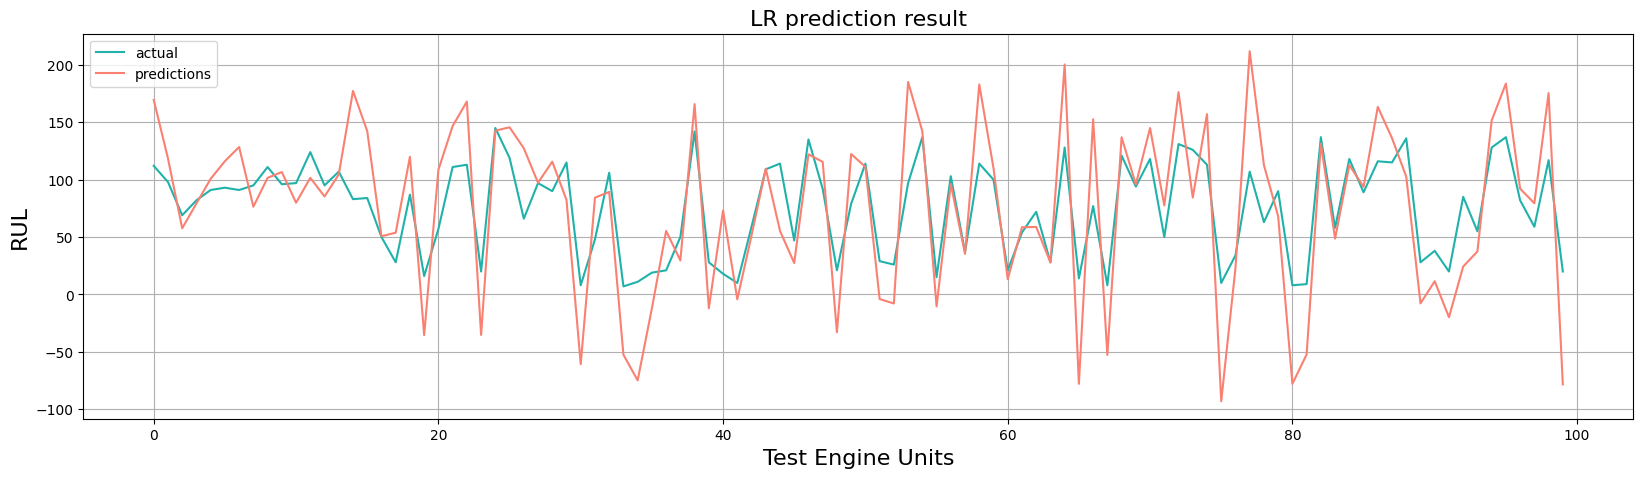

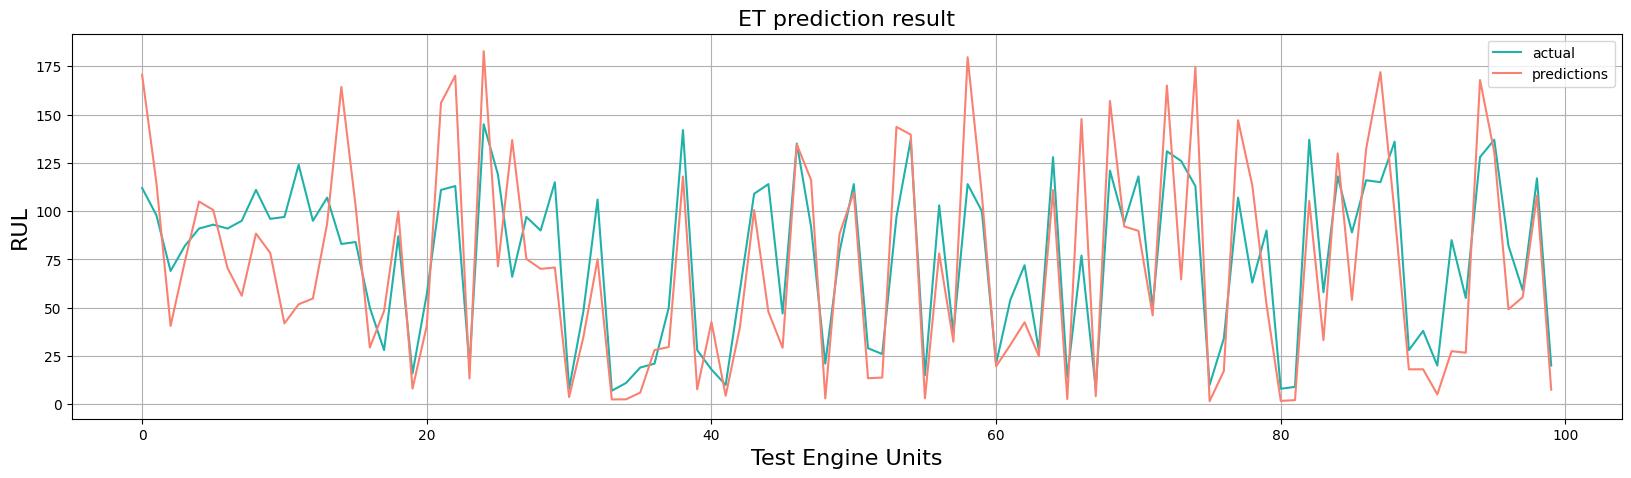

 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2667
[LightGBM] [Info] Number of data points in the train set: 14441, number of used features: 15
[LightGBM] [Info] Start training from score 107.366457


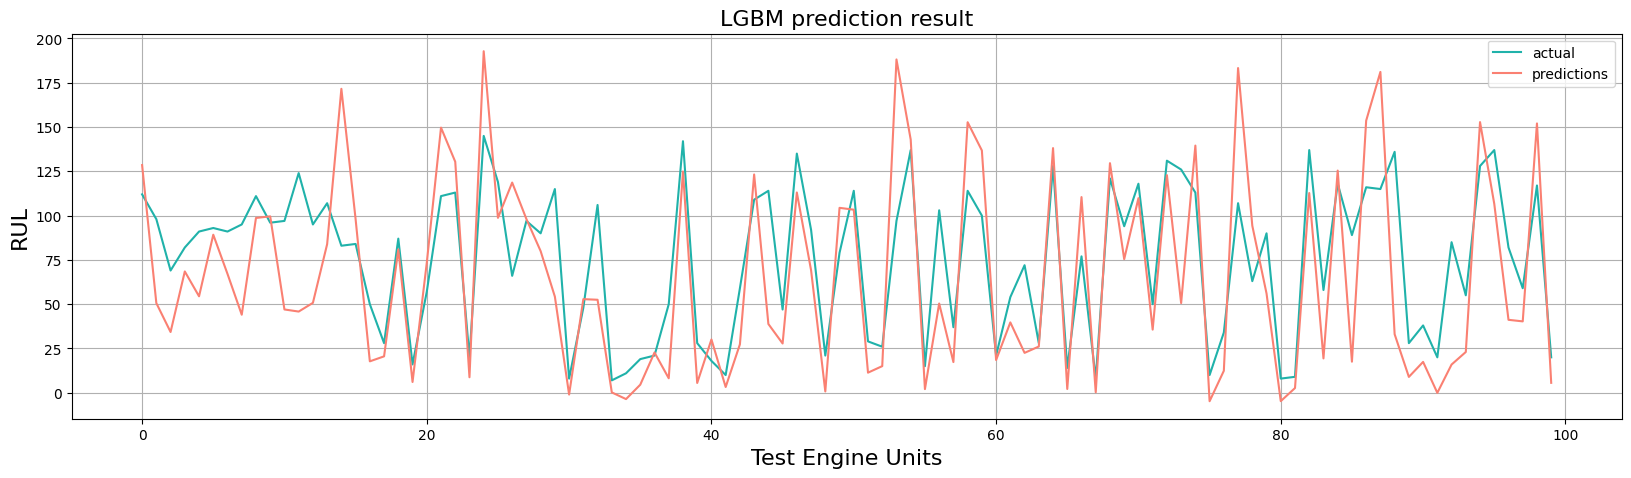

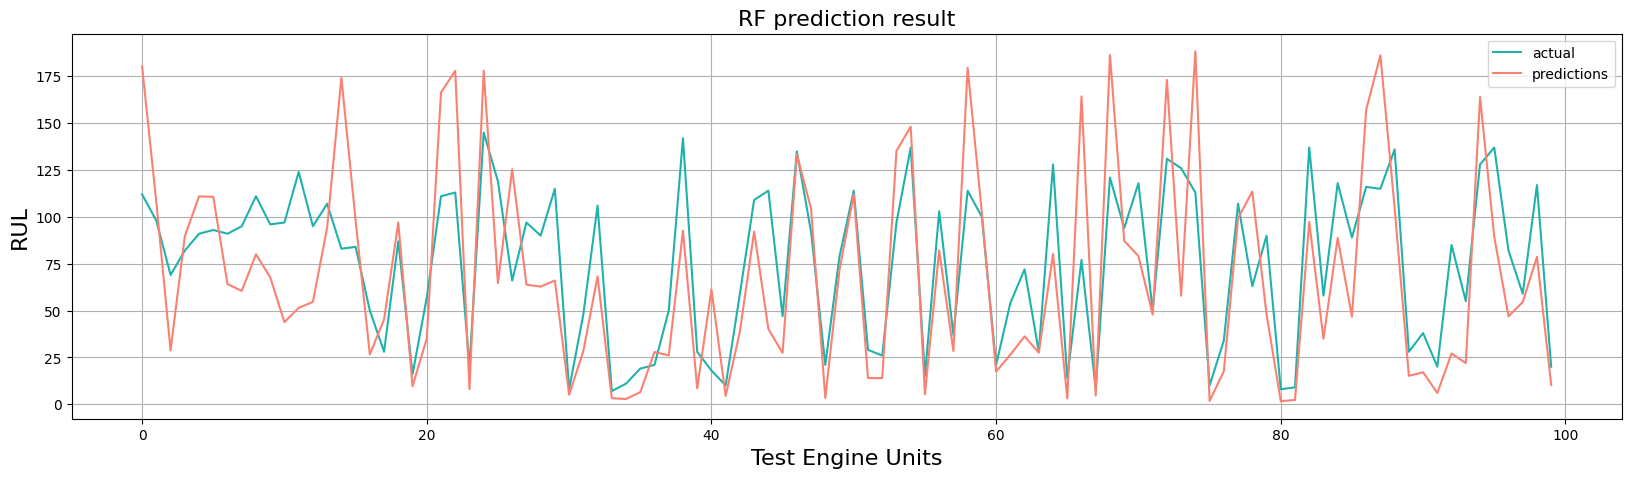

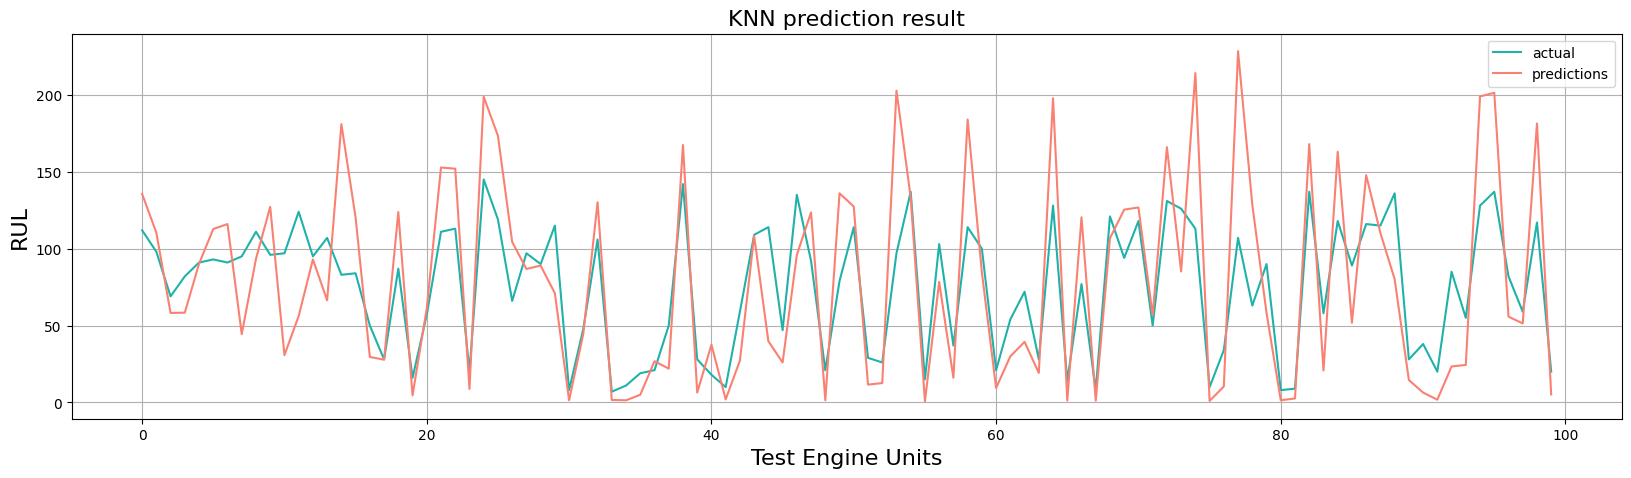

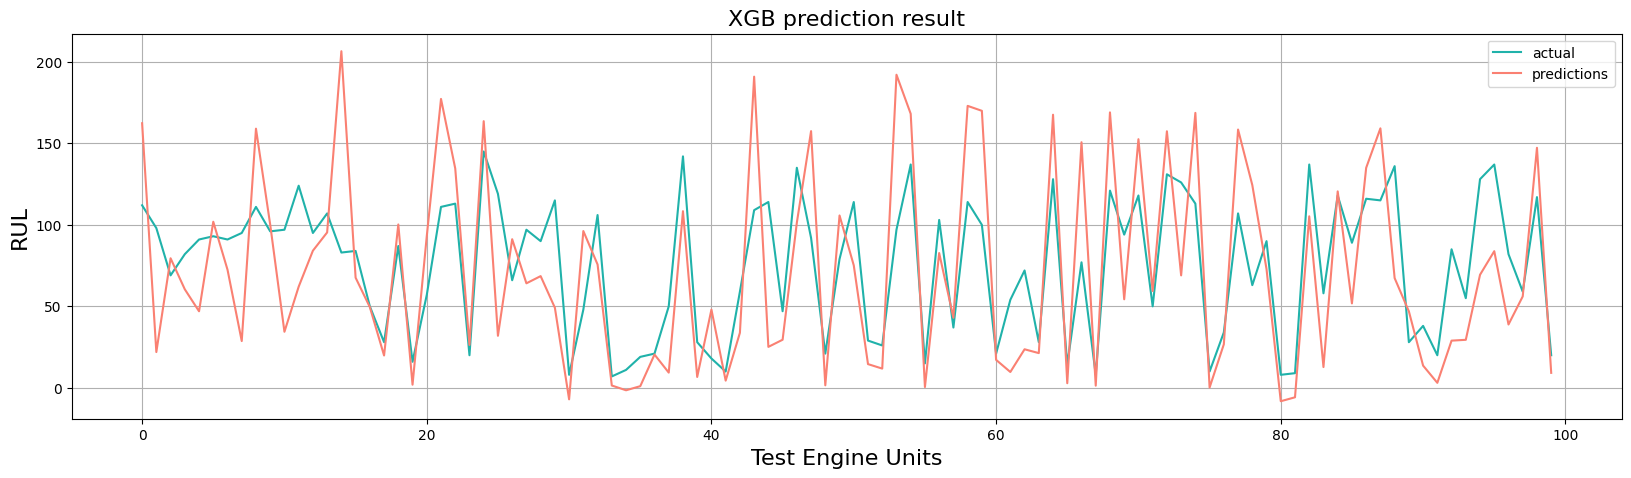

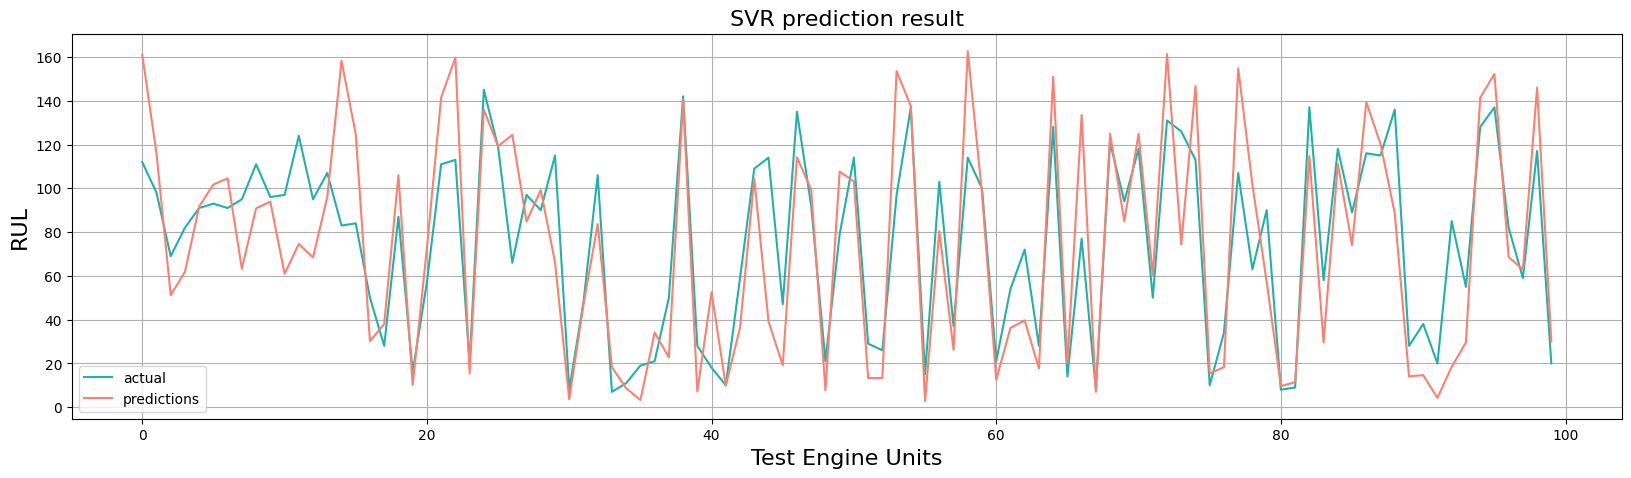

In [13]:
for model_name, model in models.items():
  model.fit(X_train_s,y_train)
  y_test_pred = model.predict(X_test_s)
  plot_predActual(y_test , y_test_pred,model_name)
  print(" ")

tiem for feature lmao 

In [14]:
drop_labels2 = ['sensor_1','sensor_5','sensor_6','sensor_10','sensor_16', 'sensor_18', 'sensor_19']
train_2_feature = train.drop(drop_labels1 + drop_labels2 , axis = 1).columns
train_2_feature

Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_17', 'sensor_20', 'sensor_21'],
      dtype='object')

In [15]:
def update_rolling_mean(data, mask):
  for x in train_2_feature:
    data[x+'_rm']=0
  for x, group in mask.groupby("unit_number"):
    for x in train_2_feature:
      data.loc[group.index[5:], x+"_rm"] = data.loc[group.index, x].rolling(5).mean()[5:]
      data.loc[group.index[:5], x+"_rm"] = data.loc[group.index[:5], x]

X_train_2 = train.copy().drop(columns = index_names + setting_names + drop_labels2 +['RUL'], axis=1)
X_test_2 = test.drop(columns = index_names + setting_names+  drop_labels2, axis=1)

update_rolling_mean(X_train_2, train)
update_rolling_mean(X_test_2, test)

In [16]:
X_test_2 = X_test_2.fillna(0)
X_test_2 = pd.concat([test['unit_number'],X_test_2],axis=1)
X_test_2 = X_test_2.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])

In [17]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_train_2,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)

In [18]:
X_train_2s = scaler.fit_transform(X_train_2)
X_valid_2s = scaler.fit_transform(X_valid_2)
X_test_2s = scaler.fit_transform(X_test_2)

In [19]:
import joblib

for model_name, model in models.items():
    print("================", model_name, "================")
    model.fit(X_train_2s, y_train_2)
    
    model_filename = f"{model_name}.joblib"
    joblib.dump(model, model_filename)
    print(f"Model saved as: {model_filename}")

    y_train_pred = model.predict(X_train_2s)  # train
    evaluate(y_train_2, y_train_pred, label='train')

    y_valid_pred = model.predict(X_valid_2s)  # validation
    evaluate(y_valid_2, y_valid_pred, label='valid')

    y_test_pred = model.predict(X_test_2s)  # test
    evaluate(y_test, y_test_pred, label='test')


================ LR ================
Model saved as: LR.joblib
train set RMSE:35.381792357902285, R2:0.6604728384733616, MAE:28.935276322069708
valid set RMSE:35.74170322929392, R2:0.6460835094548862, MAE:29.002641139207636
test set RMSE:45.48584407088135, R2:-0.1980997354059233, MAE:37.50842548221367
================ ET ================
Model saved as: ET.joblib
train set RMSE:0.0, R2:1.0, MAE:0.0
valid set RMSE:30.24653846748746, R2:0.7465445297882921, MAE:22.750548123528596
test set RMSE:30.79492409472704, R2:0.4508402082010129, MAE:22.733600000000003
================ LGBM ================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6013
[LightGBM] [Info] Number of data points in the train set: 13410, number of used features: 28
[LightGBM] [Info] Start training from score 103.302610
Model saved as: LGBM.joblib
train set RMSE:2.01680413382

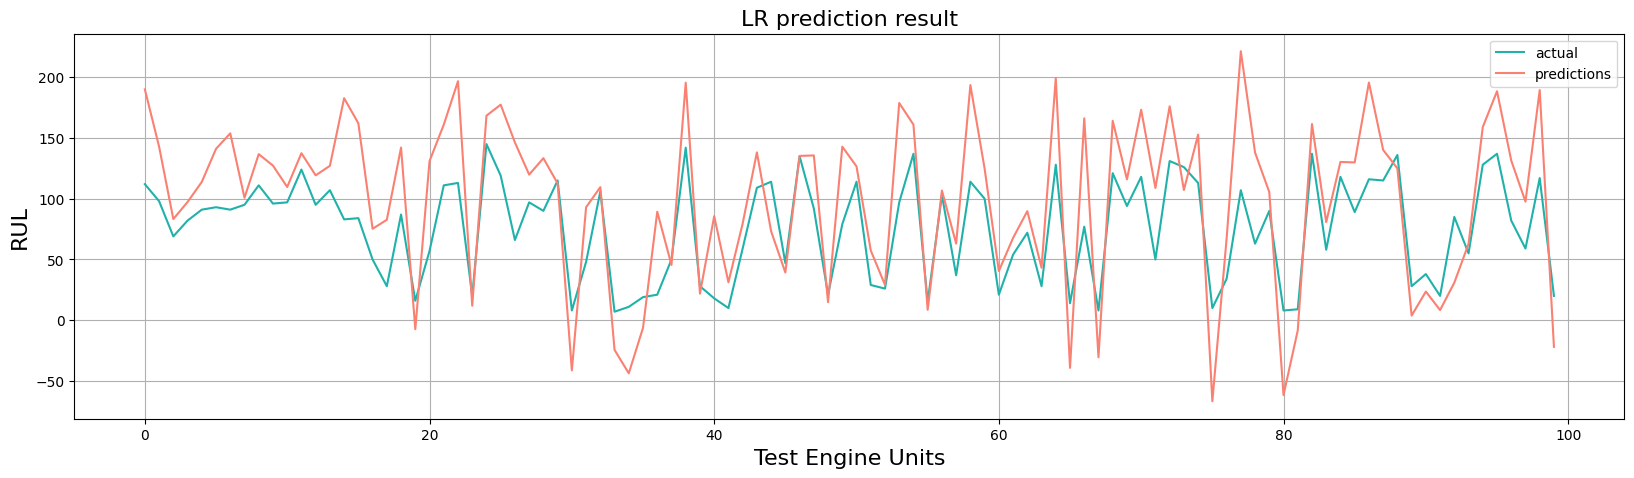

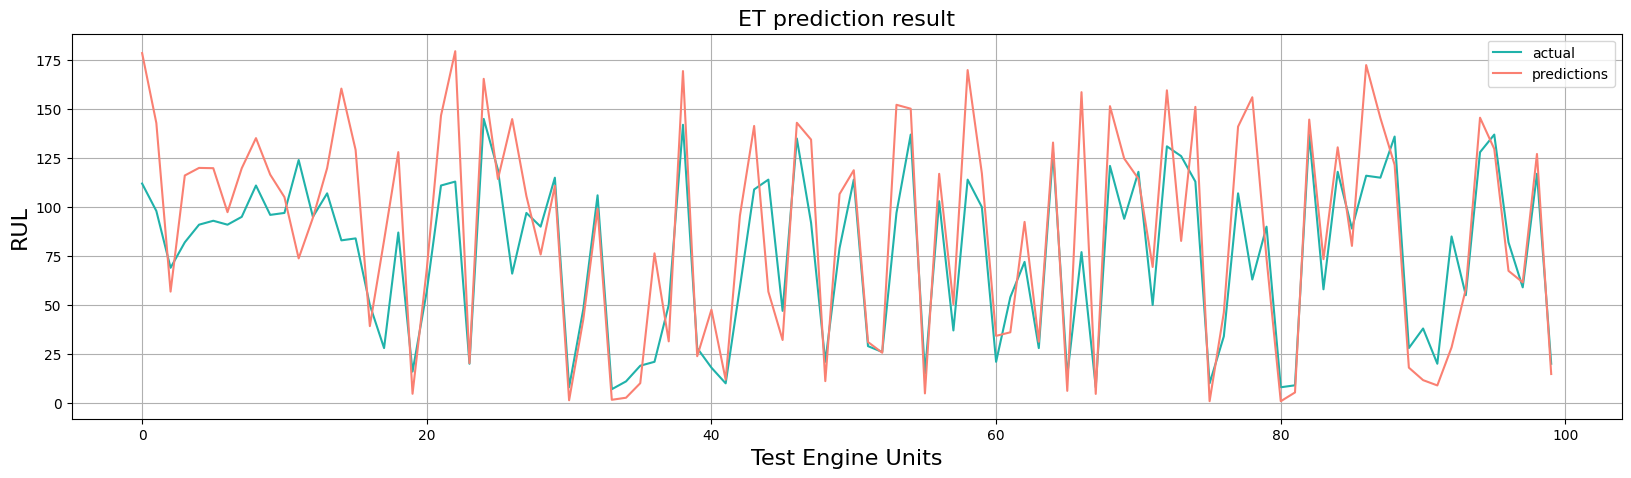

 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6013
[LightGBM] [Info] Number of data points in the train set: 13410, number of used features: 28
[LightGBM] [Info] Start training from score 103.302610


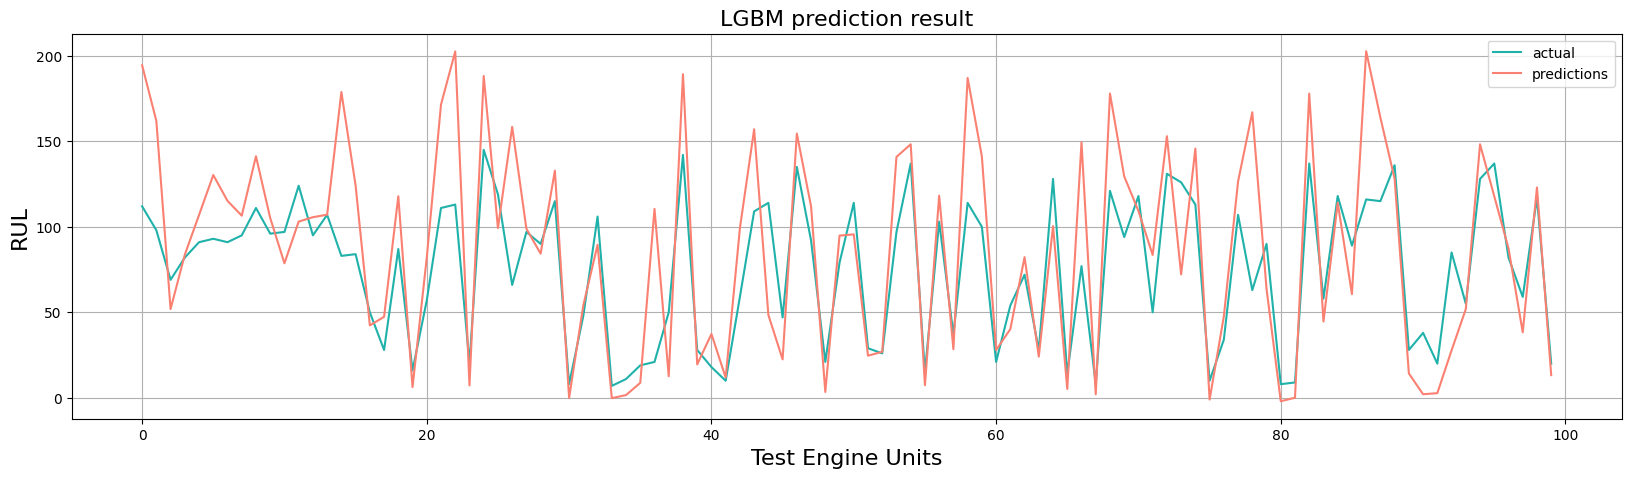

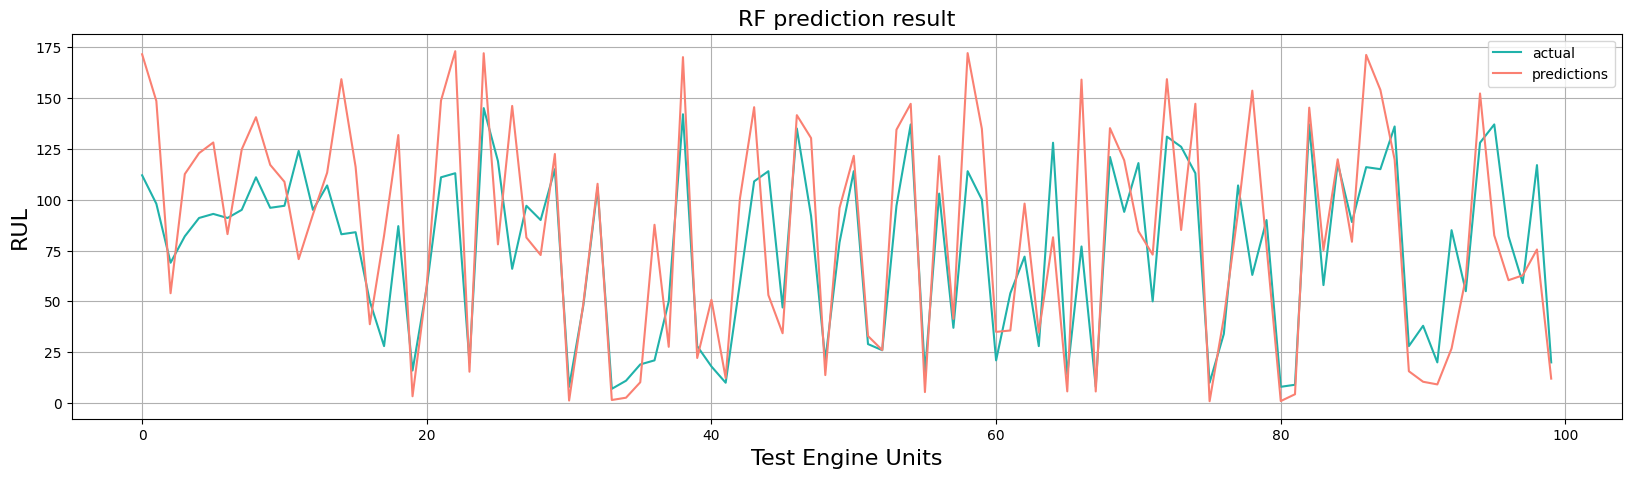

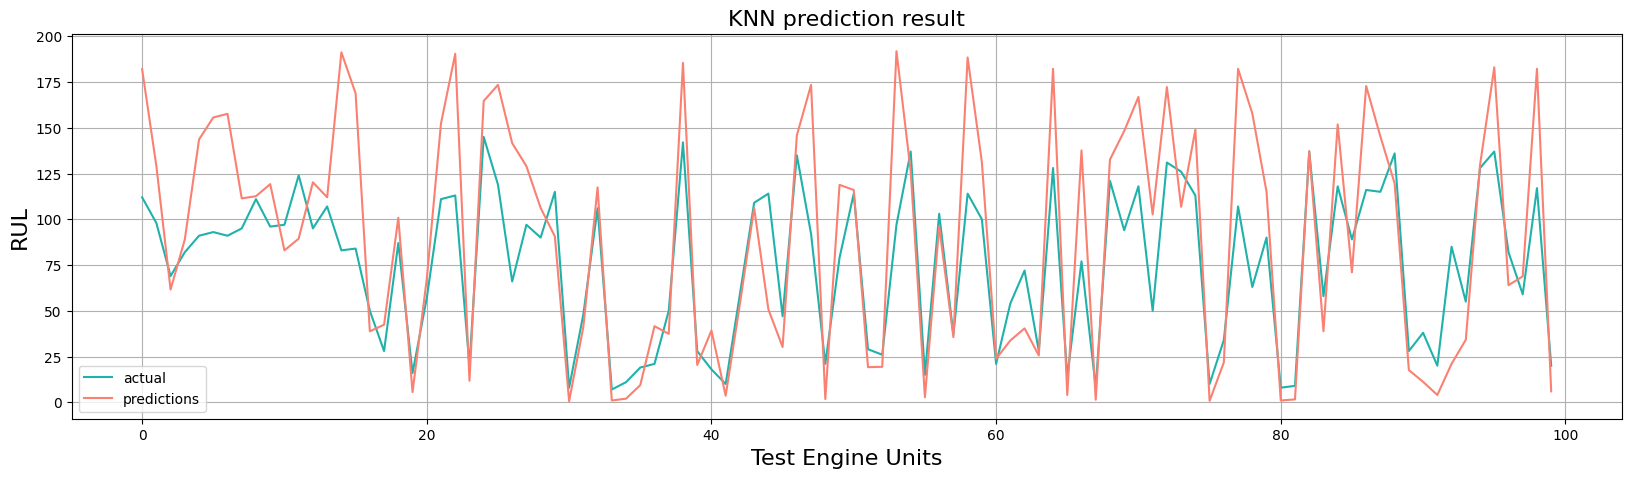

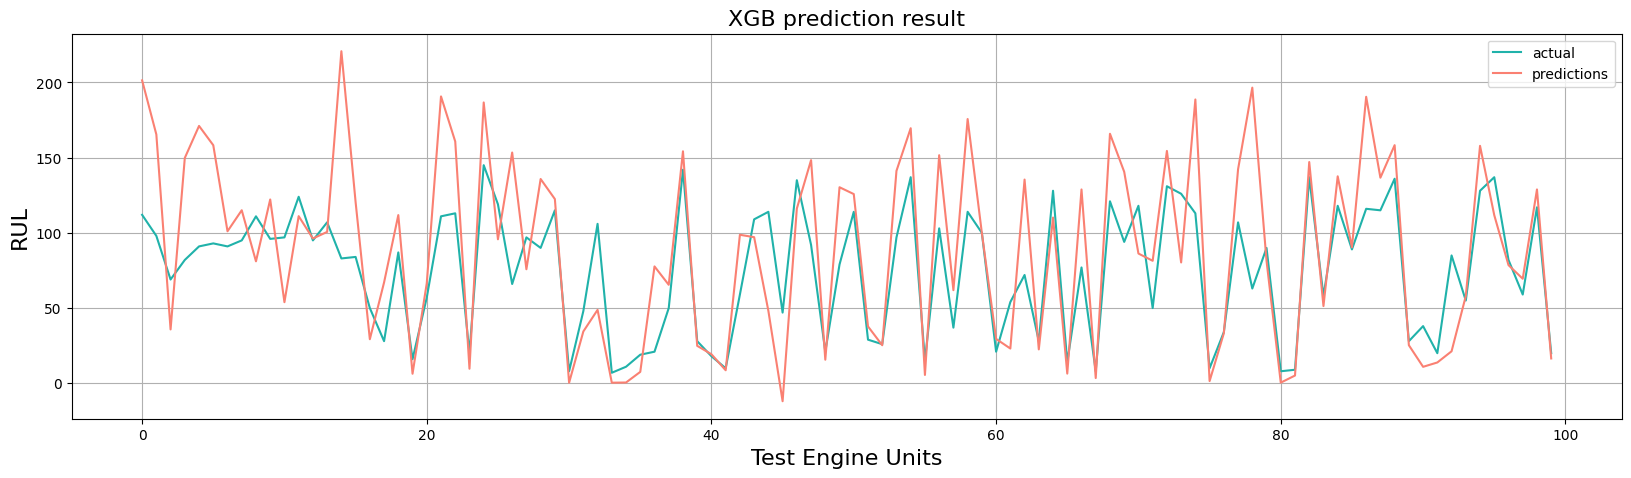

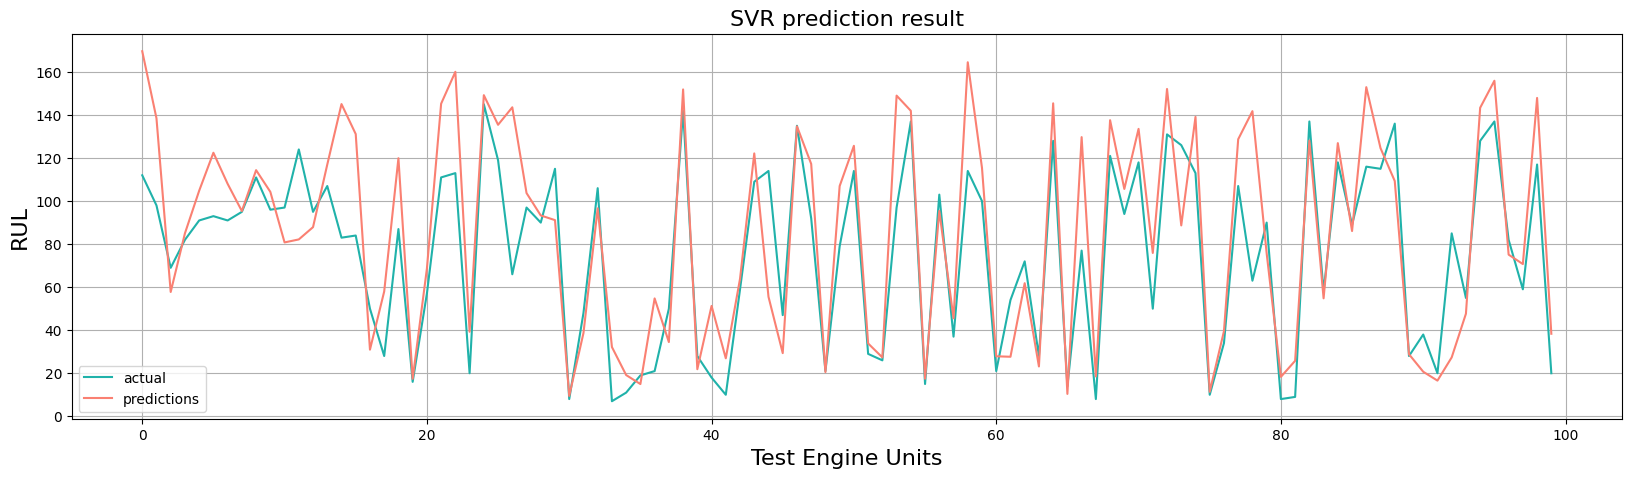

In [20]:
for model_name, model in models.items():
  model.fit(X_train_2s,y_train_2)
  y_test_pred = model.predict(X_test_2s)
  plot_predActual(y_test , y_test_pred,model_name)
  print(" ")